### Solutions for Problem Set #0

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/ps0/ps0.ipynb)

First import some of the package we will use in this exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')

In [2]:
# Read in Madison Project Database legend, so that we know which variables to use
df_legend = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx'
                          ,sheet_name='Notes',skiprows=14)
# Rename columns
df_legend.rename(columns={'Unnamed: 0':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
# Create a dictionary of var names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [3]:
# Here is my dictionary
df_legend

{'Sources': 'Sources for GDP pc and population data',
 'Full data': 'Data in a single table',
 'GDP pc': 'Real GDP per capita in 2011$',
 'Population': 'Population, mid-year (thousands)',
 'Regional data': 'Regional GDP per capita and population estimates'}

In [4]:
# The variable we will use
df_legend['GDP pc']

'Real GDP per capita in 2011$'

In [5]:
# Read in the data
df = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx',
                   sheet_name='Full data')

In [6]:
# First 5 rows of our data looks like this
df.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [7]:
# Create a dictionary of country codes and names
countries =dict(zip(df.countrycode.unique(),df.country.unique()))

In [8]:
countries

{'AFG': 'Afghanistan',
 'AGO': 'Angola',
 'ALB': 'Albania',
 'ARE': 'United Arab Emirates',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BFA': 'Burkina Faso',
 'BGD': 'Bangladesh',
 'BGR': 'Bulgaria',
 'BHR': 'Bahrain',
 'BIH': 'Bosnia and Herzegovina',
 'BLR': 'Belarus',
 'BOL': 'Bolivia (Plurinational State of)',
 'BRA': 'Brazil',
 'BRB': 'Barbados',
 'BWA': 'Botswana',
 'CAF': 'Central African Republic',
 'CAN': 'Canada',
 'CHE': 'Switzerland',
 'CHL': 'Chile',
 'CHN': 'China',
 'CIV': "Côte d'Ivoire",
 'CMR': 'Cameroon',
 'COD': 'D.R. of the Congo',
 'COG': 'Congo',
 'COL': 'Colombia',
 'COM': 'Comoros',
 'CPV': 'Cabo Verde',
 'CRI': 'Costa Rica',
 'CSK': 'Czechoslovakia',
 'CUB': 'Cuba',
 'CYP': 'Cyprus',
 'CZE': 'Czech Republic',
 'DEU': 'Germany',
 'DJI': 'Djibouti',
 'DMA': 'Dominica',
 'DNK': 'Denmark',
 'DOM': 'Dominican Republic',
 'DZA': 'Algeria',
 'ECU': 'Ecua

In [9]:
# List of countries we are asked about
country_list = ['GBR','USA','DEU','FRA','CHN','IND']

Text(0.5, 1.0, 'GDP per capita')

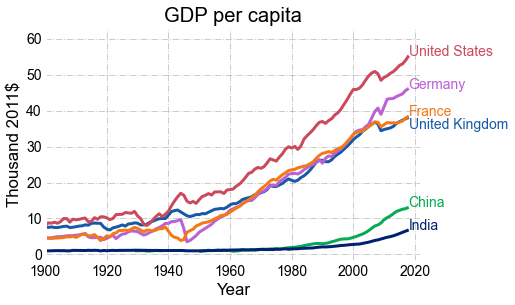

In [10]:
for country in country_list:
    data = df[df.countrycode==country].copy()
    data['gdppc'] = data.gdppc/1000
    p=plt.plot(data.year,data.gdppc)
    loc = data.iloc[-1][['year','gdppc']].values
    loc += (0,-3.000) if country == 'GBR' else 0
    plt.annotate(countries[country],loc,color=p[0].get_color())
plt.xlim(xmin=1900,xmax=2022)
plt.ylim(ymax=63)
plt.xlabel('Year')
plt.ylabel('Thousand 2011$')
plt.title('GDP per capita')

In [11]:
# Sort of countrycode and year
df.sort_values(['countrycode','year'],inplace=True)

In [12]:
# We are asked to calcualte average growth rate from 2000 to 2018
years = [2000,2018]
year_diff = years[1]-years[0] # time difference between the two years

There are many ways to calculate average annual growth rate. One method is as follows. Let $y_{i,t}$ be the GDP per capita of country $i$ at year $t$, and $y_{i,t+n}$ and be the GDP per capita of country $i$ in year $t+n$. Then the average annual growth rate of country $i$ from year $t$ to $t+n$, $g_{y}$, is equal to
$$ g_{y} = \left( \frac{y_{i,t+n}}{y_{i,t}}  \right)^{1/n} -1 .$$  

In [13]:
# Here we calculate the avarage growth rates of countries from 2000 to 2018 
# using the above formula. 
g_growth_rate = lambda x: 100*((x.iloc[1]['gdppc']/x.iloc[0]['gdppc'])**(1/year_diff)-1)
growth_rates = (df[df.year.isin(years)].groupby(['countrycode','country']).apply(g_growth_rate).reset_index().
                rename(columns={0:'Avg. Growth (2000-2018)'}))

Rule of 72: If a county grows at a rate g, it takes $72/g\cdot100$ years to double its income per capita.

In [14]:
# Apply the rule of 72
growth_rates['Years to double'] = 72/growth_rates['Avg. Growth (2000-2018)']

In [15]:
# Here is the results for all countries
growth_rates.round(decimals={'Avg. Growth (2000-2018)':2,'Years to double':0})

,countrycode,country,Avg. Growth (2000-2018),Years to double
0,AFG,Afghanistan,7.78,9.0
1,AGO,Angola,7.79,9.0
2,ALB,Albania,4.76,15.0
3,ARE,United Arab Emirates,2.51,29.0
4,ARG,Argentina,1.43,50.0
...,...,...,...,...
164,YEM,Yemen,-3.34,-22.0
165,YUG,Former Yugoslavia,3.79,19.0
166,ZAF,South Africa,2.66,27.0
167,ZMB,Zambia,5.16,14.0


In [16]:
# Here is the results for the selected countries
(growth_rates[growth_rates.countrycode.isin(country_list)].
 round(decimals={'Avg. Growth (2000-2018)':2,'Years to double':0}))

,countrycode,country,Avg. Growth (2000-2018),Years to double
26,CHN,China,5.82,12.0
39,DEU,Germany,1.82,40.0
51,FRA,France,0.79,91.0
53,GBR,United Kingdom,0.98,74.0
68,IND,India,5.16,14.0
160,USA,United States,1.05,69.0


Suppose evolution of variable $x$ over time is defined with the following formula:

$$
x(t+1) = mx(t)^{\alpha}+ nx(t),
$$


where $m=0.2$, $\alpha=0.5$, and $n=0.9$, meaning the value of $x$ at time $t+1$ is equal to 0.2 times the value of $x$ at time $t$ to the power 0.5 plus 0.9 times the value of $x$ at time $t$. Suppose $x(0)=1$, the value of $x$ at time $t=0$ is equal to 1. 

Simulate $x$ for 100 periods starting from time $t=0$. 

**Hint**: You know $x(0)$. Using the above formula and the value of $x(0)$, you can find $x(1)$. Then using the above formula and the value of $x(1)$, you can calculate $x(2)$. You can repeat this exercise until you reach $x(100)$.

_Again, I don't want you to write the same formula 100 times. It will take so much time, which is not my goal. If you are using excel, write the formula once in such a way that you can drag the cell down and simulate $x$ for as many periods as you wish._

In [17]:
m, alpha, n = 0.2, 0.5,0.9 # define parameter values
T = 100 # define time period
x = np.zeros(T+1) # empty list to filled
x[0] = 1 # x(0) = 1
f = lambda x: m*x**alpha + n*x # the function in the question
# simulate 100 periods
for t in range(T):
    # we call the function f and append to the list
    x[t+1]=f(x[t])

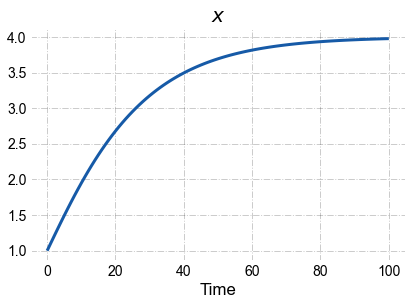

In [18]:
# Plot the results
plt.plot(x)
plt.xlabel('Time');
plt.title(r'$x$');